In [11]:
import numpy as np
import matplotlib.pyplot as plt


import math
import csv
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import matplotlib as mpl

#matplotlib.verbose.level = 'debug-annoying'
mpl.rcParams.update({'font.size': 16})
import sys
import os

In [42]:
weirdFile = "/mnt/d/Programme/RootReader/RootReader-master/runlogs/weirdEvents.txt"

df = pd.read_csv(weirdFile, skiprows=0, sep="\t", names=["Runname", "weird", "total", "ratio"])

keys = df.columns

df[:50]


,Runname,weird,total,ratio
0,1_1204_day,20,1001,0.019980
1,1_1204_day,13,1001,0.012987
2,1_1204_day,19,1001,0.018981
3,1_1204_day,8,1001,0.007992
4,1_1204_day,84,1001,0.083916
5,1_1204_day,2,1001,0.001998
6,1_1204_day,16,1001,0.015984
7,1_1204_day,11,1001,0.010989
8,1_1204_day,20,1001,0.019980
9,1_1204_day,7,1001,0.006993


In [61]:
summedDataDay = pd.DataFrame(columns=["Runname", "weird", "total", "ratio"])
summedDataNight = pd.DataFrame(columns=["Runname", "weird", "total", "ratio"])
runBefore = df["Runname"][0]
fileNumber = 0
weirdCounter = 0
totalCounter = 0
ratio = 0
print("first run", runBefore)

for i, run in enumerate(df["Runname"][:]):

    #print(totalCounter)
    print(run)
    print(weirdCounter, totalCounter)
    
    if run == runBefore:
        fileNumber += 1
        weirdCounter += df["weird"][i]
        totalCounter += df["total"][i]
        runBefore = run
    else:
        #print(run)
        ratio = (weirdCounter*1.0)/totalCounter
        data = [runBefore, weirdCounter, totalCounter, ratio]
        print(data)
        if "day" in run:
            summedDataDay = summedDataDay.append(dict(zip(summedDataDay.columns, data)), 
            ignore_index=True)
            summedDataNight = summedDataNight.append(dict(zip(summedDataDay.columns, [runBefore,None,None,None])), ignore_index=True)
        else:
            summedDataNight = summedDataNight.append(dict(zip(summedDataDay.columns, data)), ignore_index=True)
            summedDataDay = summedDataDay.append(dict(zip(summedDataDay.columns, [runBefore,None,None,None])), ignore_index=True)

        fileNumber = 0
        weirdCounter = 0
        totalCounter = 0
        ratio = 0

        fileNumber += 1
        weirdCounter += df["weird"][i]
        totalCounter += df["total"][i]
        runBefore = run

  #  print(weirdCounter)
  #  print(fileNumber)

ratio = (weirdCounter*1.0)/totalCounter
data = [runBefore, weirdCounter, totalCounter, ratio]

if "day" in run:
    summedDataDay = summedDataDay.append(dict(zip(summedDataDay.columns, data)), 
        ignore_index=True)
    summedDataNight = summedDataNight.append(dict(zip(summedDataDay.columns, [runBefore,None,None,None])), ignore_index=True)
else:
    summedDataNight = summedDataNight.append(dict(zip(summedDataDay.columns, data)), ignore_index=True)
    summedDataDay = summedDataDay.append(dict(zip(summedDataDay.columns, [runBefore,None,None,None])), ignore_index=True)


first run 1_1204_day
1_1204_day
0 0
1_1204_day
20 1001
1_1204_day
33 2002
1_1204_day
52 3003
1_1204_day
60 4004
1_1204_day
144 5005
1_1204_day
146 6006
1_1204_day
162 7007
1_1204_day
173 8008
1_1204_day
193 9009
2_1204_night
200 10010
['1_1204_day', 200, 10010, 0.01998001998001998]
2_1204_night
2 1001
2_1204_night
10 2002
2_1204_night
21 3003
2_1204_night
36 4004
2_1204_night
42 5005
2_1204_night
48 6006
2_1204_night
56 7007
2_1204_night
65 8008
2_1204_night
70 9009
3_1304_day
104 10010
['2_1204_night', 104, 10010, 0.01038961038961039]
3_1304_day
9 1001
3_1304_day
13 2002
3_1304_day
17 3003
3_1304_day
22 4004
3_1304_day
32 5005
3_1304_day
46 6006
3_1304_day
51 7007
3_1304_day
58 8008
3_1304_day
65 9009
4_1404_day
70 10010
['3_1304_day', 70, 10010, 0.006993006993006993]
4_1404_day
8 1001
4_1404_day
22 2002
4_1404_day
28 3003
4_1404_day
42 4004
4_1404_day
48 5005
4_1404_day
57 6006
4_1404_day
66 7007
4_1404_day
77 8008
4_1404_day
86 9009
5_1404_night
88 10010
['4_1404_day', 88, 10010, 0.

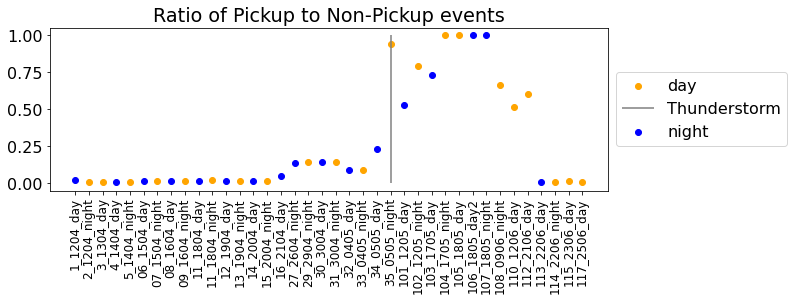

In [65]:
plt.figure(figsize=(10,3))
plt.title("Ratio of Pickup to Non-Pickup events")


plt.scatter(summedDataDay["Runname"], summedDataDay["ratio"], label="day", c="orange")
plt.vlines("35_0505_night", 0, 1, colors="grey", label="Thunderstorm")
plt.scatter(summedDataNight["Runname"], summedDataNight["ratio"], label="night", c="blue")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
degrees = 90

plt.xticks(fontsize=12, rotation=degrees)
plt.show()

In [63]:
summedDataDay.tail(n=20)

,Runname,weird,total,ratio
18,30_3004_day,None,None,NaN
19,31_3004_night,286,1995,0.143358
20,32_0405_day,None,None,NaN
21,33_0405_night,735,8016,0.091692
22,34_0505_day,None,None,NaN
23,35_0505_night,7506,8016,0.936377
24,101_1205_day,None,None,NaN
25,102_1205_night,6349,8016,0.792041
26,103_1705_day,None,None,NaN
27,104_1705_night,8818,8818,1.000000


In [64]:
summedDataNight.head(n=30)

,Runname,weird,total,ratio
0,1_1204_day,200,10010,0.019980
1,2_1204_night,None,None,NaN
2,3_1304_day,None,None,NaN
3,4_1404_day,88,10010,0.008791
4,5_1404_night,None,None,NaN
5,06_1504_day,128,10010,0.012787
6,07_1504_night,None,None,NaN
7,08_1604_day,127,10010,0.012687
8,09_1604_night,None,None,NaN
9,11_1804_day,166,10010,0.016583
